#📌 1.Extracão

In [29]:
import pandas as pd

df_bruto = pd.read_json('TelecomX_Data.json')

# Vamos ver as primeiras linhas para ter uma ideia da estrutura
print(df_bruto.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 2.Transformação

#Parte 1: Ajeitando as colunas

In [30]:

df_customer = pd.json_normalize(df_bruto['customer'])
df_phone = pd.json_normalize(df_bruto['phone'])
df_internet = pd.json_normalize(df_bruto['internet'])
df_account = pd.json_normalize(df_bruto['account'])

print(df_account['Charges.Total'].unique())


df_account['Charges.Total'] = pd.to_numeric(df_account['Charges.Total'], errors='coerce')

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


#Parte 2: Unindo os dados

In [31]:
# Unindo os DataFrames
df_completo = pd.concat([df_bruto[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Verificando a nova estrutura
print(df_completo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Parte 3: Tratando dados ausentes e inconsistentes

In [33]:
# Identificando e preenchendo o valor ausente
df_completo['Churn'] = df_completo['Churn'].replace('', 'No')
print(df_completo['Churn'].value_counts())

Churn
No     5398
Yes    1869
Name: count, dtype: int64


In [34]:
#Melhorando a visualização para tornar a coluna mais fácil de entender em gráficos.
df_completo['SeniorCitizen'] = df_completo['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [36]:
# Criação da nova coluna 'Contas_Diarias'

# df_completo é o nosso DataFrame já limpo e organizado
df_completo['Contas_Diarias'] = df_completo['Charges.Monthly'] / 30

# Ver as primeiras linhas para confirmar que a coluna foi criada
print(df_completo.head())

# Verificar as informações do DataFrame para ver o tipo da nova coluna
print(df_completo.info())

   customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female            No     Yes        Yes       9   
1  0003-MKNFE    No    Male            No      No         No       9   
2  0004-TLHLJ   Yes    Male            No      No         No       4   
3  0011-IGKFF   Yes    Male           Yes     Yes         No      13   
4  0013-EXCHZ   Yes  Female           Yes     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year           

In [37]:
# Salvando o DataFrame limpo em um arquivo CSV
df_completo.to_csv('telecom_churn_limpo.csv', index=False)
print("Dados transformados e salvos com sucesso!")

Dados transformados e salvos com sucesso!


#📊 3.Carga e análise

#🔍Análise Exploratória de Dados (EDA) e Visualização

#Parte 1: Estatística Descritiva

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lembre-se, primeiro você deve ter o DataFrame df_completo criado,
# com todas as transformações que já fizemos, incluindo a nova coluna 'Contas_Diarias'.
# df_completo['Contas_Diarias'] = df_completo['Charges.Monthly'] / 30

# 1. Análise descritiva dos dados numéricos
print("Estatísticas descritivas das colunas numéricas:")
print(df_completo[['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']].describe())


Estatísticas descritivas das colunas numéricas:
            tenure  Charges.Monthly  Charges.Total  Contas_Diarias
count  7267.000000      7267.000000    7256.000000     7267.000000
mean     32.346498        64.720098    2280.634213        2.157337
std      24.571773        30.129572    2268.632997        1.004319
min       0.000000        18.250000      18.800000        0.608333
25%       9.000000        35.425000     400.225000        1.180833
50%      29.000000        70.300000    1391.000000        2.343333
75%      55.000000        89.875000    3785.300000        2.995833
max      72.000000       118.750000    8684.800000        3.958333


#Parte 2: Visualizando as Relações

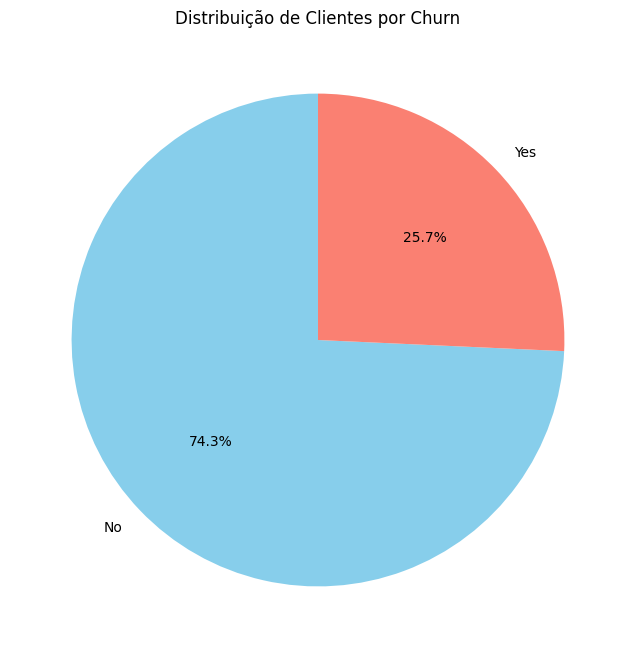

In [25]:
# 2. Visualização da proporção de Churn
plt.figure(figsize=(8, 8))
# Gráfico de pizza para visualização
df_completo['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribuição de Clientes por Churn')
plt.ylabel('') # Remove a label do eixo y
plt.show()

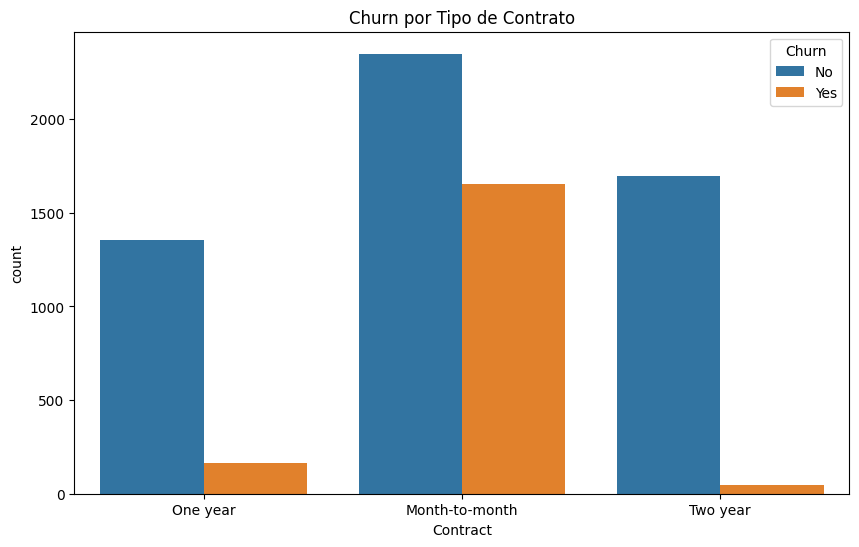

In [26]:
# 3. Explorar Churn com outras variáveis categóricas
# Contrato
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df_completo)
plt.title('Churn por Tipo de Contrato')
plt.show()

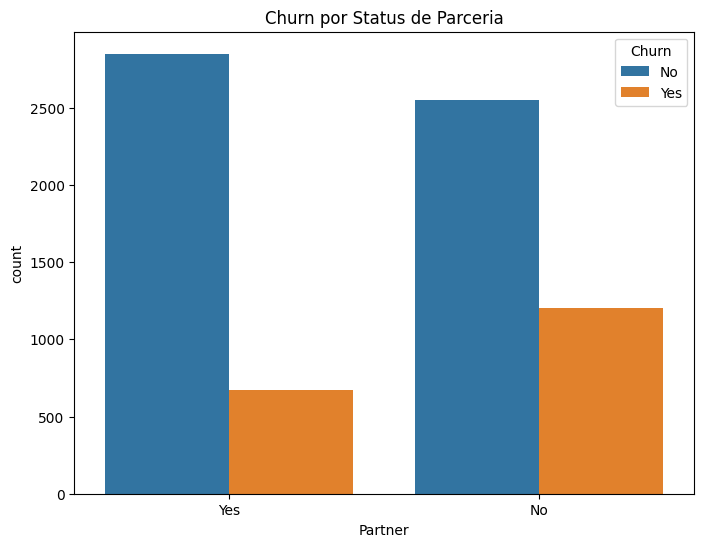

In [ ]:
# Métrica Parceria (Partner)
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=df_completo)
plt.title('Churn por Status de Parceria')
plt.show()

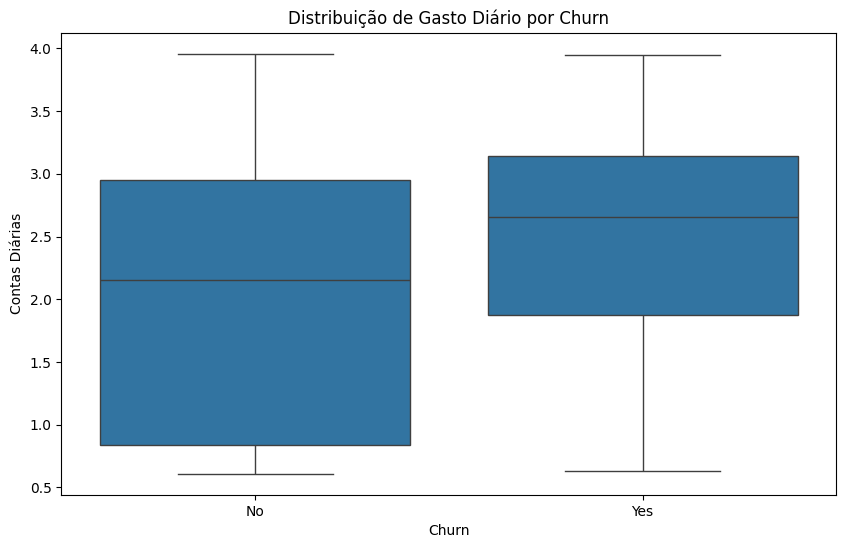

In [40]:
# 4. Explorar Churn com a nova variável numérica "Contas_Diarias"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_completo)
plt.title('Distribuição de Gasto Diário por Churn')
plt.xlabel('Churn')
plt.ylabel('Contas Diárias')
plt.show()

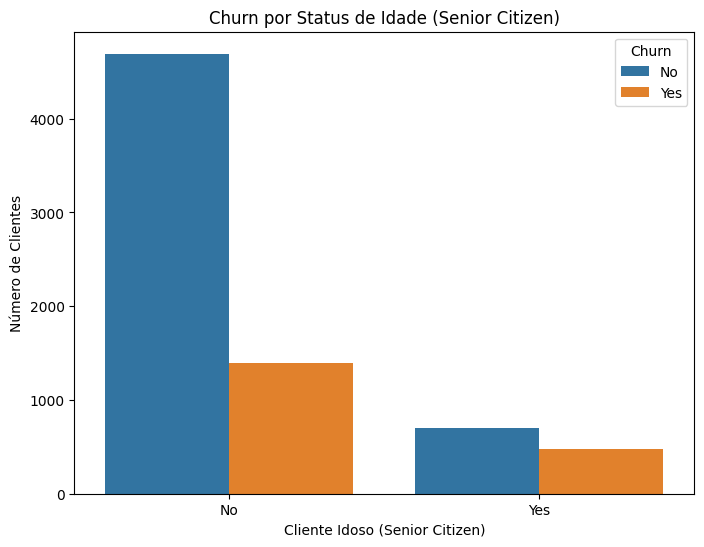

In [ ]:
plt.figure(figsize=(8, 6))

# Criando o gráfico de barras
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_completo)

plt.title('Churn por Status de Idade (Senior Citizen)')
plt.xlabel('Cliente Idoso (Senior Citizen)')
plt.ylabel('Número de Clientes')
plt.show()

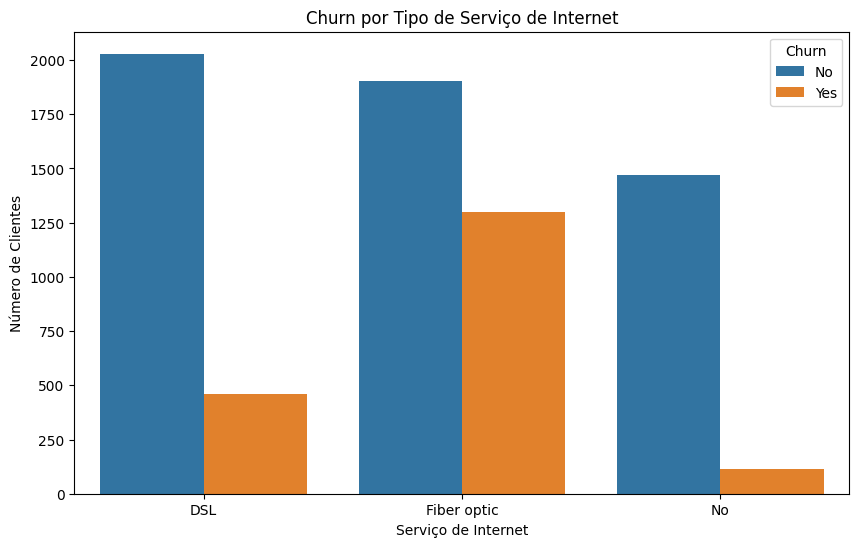

In [44]:
# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criação do gráfico de barras para Churn por Serviço de Internet
sns.countplot(x='InternetService', hue='Churn', data=df_completo)

# Adição de título e rótulos
plt.title('Churn por Tipo de Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()

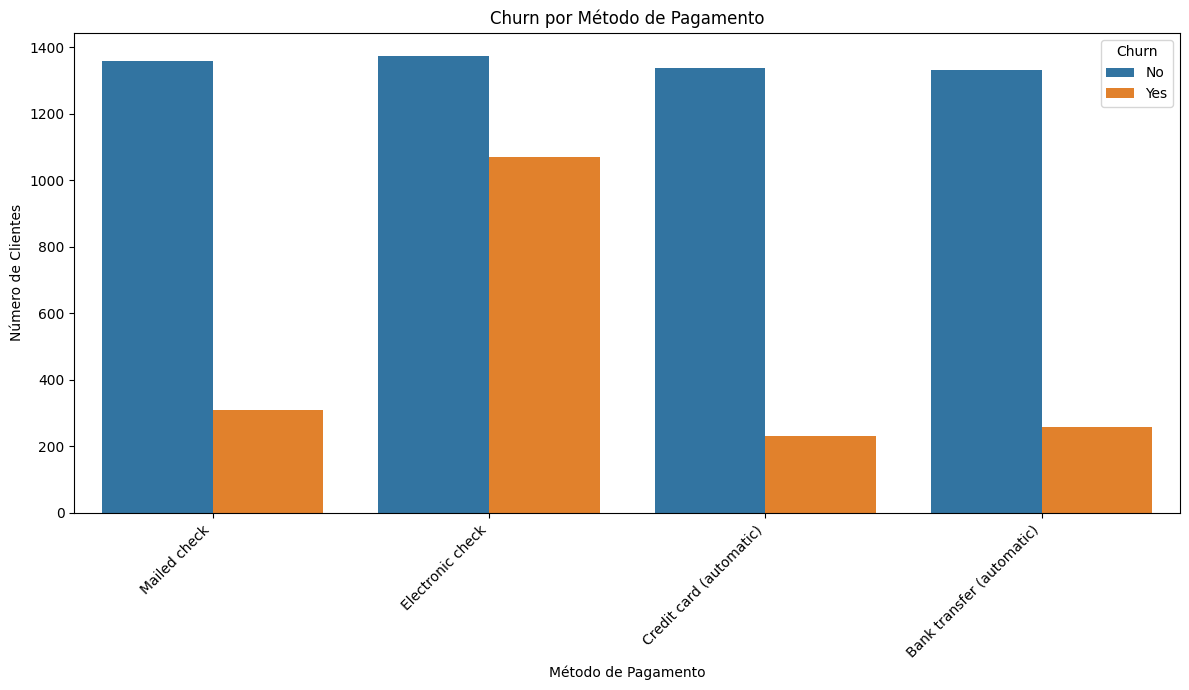

In [45]:
# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 7))

# Criação do gráfico de barras para Churn por Método de Pagamento
sns.countplot(x='PaymentMethod', hue='Churn', data=df_completo)

# Adição de título e rótulos
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Ajusta o layout para que os rótulos não se sobreponham
plt.show()

#📄Relatorio Final

#RELATÓRIO DE ANÁLISE DE EVASÃO DE CLIENTES (CHURN) - TELECOM X
##1. Introdução: O Problema do Churn
-O principal objetivo deste projeto foi entender as razões por trás da evasão de clientes (Churn) na empresa Telecom X. O Churn representa a perda de clientes que cancelaram seus serviços, o que impacta diretamente a receita e o crescimento da empresa. Ao identificar os padrões de evasão, podemos ajudar a desenvolver estratégias para reter esses clientes.

##2. Limpeza e Tratamento de Dados
Para que a análise fosse precisa, a primeira etapa foi organizar e limpar os dados brutos. Os passos realizados foram:

-Importação: Os dados foram carregados de um arquivo JSON para um formato de tabela (DataFrame), facilitando a manipulação.

-Estruturação: A estrutura aninhada dos dados foi "achatada" para que cada linha representasse um cliente, com todas as suas informações em colunas separadas.

-Tratamento de Inconsistências: A coluna de faturamento total (Charges.Total), que estava como texto, foi ajustada para um formato numérico. Valores ausentes e vazios nas colunas de Churn e Charges.Total também foram corrigidos.

-Enriquecimento de Dados: Criação de uma nova coluna chamada Contas_Diarias para obter uma visão mais detalhada do gasto diário dos clientes. A coluna SeniorCitizen foi ajustada para ser mais fácil de entender em gráficos.

##3. Análise Exploratória de Dados (EDA)
Com os dados limpos, foi feita uma análise visual para descobrir padrões de comportamento. As principais descobertas foram:

-Taxa de Churn Geral: Cerca de 25.7% dos clientes da empresa cancelaram seus serviços, o que indica um problema significativo.

-Tipo de Contrato: Clientes com contrato Mês-a-mês apresentam uma taxa de evasão muito maior do que aqueles com contratos de um ou dois anos.

-Serviço de Internet: Clientes que utilizam Fibra Ótica mostraram uma taxa de Churn consideravelmente alta, o que sugere um problema com a qualidade ou o valor percebido do serviço.

-Método de Pagamento: O método de Cheque Eletrônico está fortemente associado a uma maior taxa de evasão.

-Gasto Diário: O boxplot revelou que clientes com um gasto diário mais alto tendem a ter uma probabilidade maior de cancelar o serviço.

-Idade: A análise mostrou que clientes idosos (SeniorCitizen) também apresentam uma taxa de Churn mais alta que os clientes mais jovens.

##4. Conclusões e Insights
A análise mostrou que os clientes mais propensos a cancelar o serviço da Telecom X são:

-Aqueles com contratos Mês-a-mês.

-Que utilizam o serviço de internet Fibra Ótica.

-Que pagam com Cheque Eletrônico.

-Que têm um gasto diário mais alto.

O principal insight é que o valor percebido em relação ao preço é um fator crucial. Clientes que gastam mais e não têm a segurança de um contrato de longo prazo se sentem mais à vontade para buscar alternativas.

##5. Recomendações
Com base nas conclusões, as seguintes ações podem ser tomadas para ajudar a reduzir a evasão:

-Campanhas de Retenção: Criar campanhas focadas nos clientes de alto risco (contrato Mês-a-mês etc) para oferecer-lhes melhores condições e incentivos para permanecerem.

-Promoção de Contratos: Incentivar clientes a migrarem de contratos Mês-a-mês para contratos de longo prazo, oferecendo descontos ou benefícios exclusivos.

-Revisão de Serviços: Investigar os motivos da alta evasão em serviços de Fibra Ótica e com o pagamento por Cheque Eletrônico, para identificar e corrigir possíveis problemas técnicos ou de experiência do cliente.